In [1]:
import pandas as pd 
import nltk 
# nltk.download('vader_lexicon')
# nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import matplotlib
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt


C:\Users\aa\Anaconda2\envs\Tensorflow\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
comments_df = pd.read_csv('gnm_comments.csv')
comments_df.head()

C:\Users\aa\Anaconda2\envs\Tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,9,10,11,13,14,16,17,18,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,article_id,comment_counter,comment_author,timestamp,post_time,comment_text,TotalVotes,posVotes,negVotes,vote,...,highlightGroups,moderatorEdit,descendantsCount,threadTimestamp,flagCount,sender_isSelf,sender_loginProvider,data_type,is_empty,status
0,10012655,source1_10012655_0,modoglobe,1.364221e+12,NaN,I think the program needs some work and probab...,0.0,NaN,NaN,none,...,[],NaN,NaN,1.377139e+12,0.0,False,Site,comment,N,published
1,10012655,source1_10012655_1,stueegee,1.364167e+12,NaN,This is just 'offshoring' in reverse as well a...,0.0,NaN,NaN,none,...,[],NaN,NaN,1.377139e+12,0.0,False,Site,comment,N,published
2,10012655,source1_10012655_2,EJS1018,1.363965e+12,NaN,How do you spell exploitation? This is a disgu...,0.0,NaN,NaN,none,...,[],NaN,NaN,1.377139e+12,0.0,False,Site,comment,N,published
3,10012655,source1_10012655_3,Seedy How,1.363958e+12,NaN,TFWs have a place in the economy. Most Canadia...,0.0,NaN,NaN,none,...,[],NaN,NaN,1.377139e+12,0.0,False,Site,comment,N,published
4,10012655,source1_10012655_4,Roger_M,1.363920e+12,NaN,Why should temporary workers get paid more?? H...,0.0,NaN,NaN,none,...,[],NaN,NaN,1.377139e+12,0.0,False,Site,comment,N,published


In [7]:
articles_df = pd.read_csv('gnm_articles.csv')
articles_df.published_date = pd.to_datetime(articles_df.published_date.str[:10], format='%Y-%m-%d', errors='ignore')
articles_df

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text
0,26842506,The Tories deserve another mandate - Stephen H...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2015-10-16,2187,1378,<p>All elections are choices among imperfect a...
1,26055892,Harper hysteria a sign of closed liberal minds,http://www.theglobeandmail.com/opinion/harper-...,Konrad Yakabuski,2015-08-24,1103,455,<p>If even a fraction of the darkness that his...
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05,1164,433,<p>Large elements of aboriginal Canada live in...
3,19047636,The Globe's editorial board endorses Tim Hudak...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2014-06-06,905,432,"<p>Over four days, The Globe editorial board l..."
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02,1129,411,<p>Growing discontent among Arab nations over ...
5,26691065,"Fifty years in Canada, and now I feel like a s...",http://www.theglobeandmail.com/opinion/fifty-y...,SHEEMA KHAN,2015-10-07,1142,376,"<p>'Too broken to write,' I told my editor, af..."
6,25731634,I'm Canadian - and I should have a right to vote,http://www.theglobeandmail.com/opinion/im-cana...,Donald Sutherland,2015-07-28,1021,348,<p>My name is Donald Sutherland. My wife's nam...
7,27559108,"Two nannies? That's a little rich, Mr. Prime M...",http://www.theglobeandmail.com/opinion/two-nan...,Julie Smyth,2015-12-02,842,348,<p>Julie Smyth is an Ottawa-based writer</p><p...
8,13647608,"A nation of $100,000 firefighters",http://www.theglobeandmail.com/opinion/a-natio...,Margaret Wente,2013-08-08,1102,338,<p>Everyone loves firefighters. They save live...
9,19767742,Our duty is to stand firm in the face of Russi...,http://www.theglobeandmail.com/opinion/our-dut...,Stephen Harper,2014-07-25,711,327,<p>Stephen Harper is the Prime Minister of Can...


# Calculate sentiments for comments

In [5]:
sentences2 = [tokenize.sent_tokenize(item) for item in comments_df.comment_text]

sid = SentimentIntensityAnalyzer()

sentiments = list() 

# for item in sentences2[:10]:    
for item in sentences2:    
    pos = 0
    neu = 0
    neg = 0
    compound = 0
    for sentence in item: 
        ss = sid.polarity_scores(sentence)
#         print(ss)
#         print(ss['compound'])
        
        pos += float(ss['pos'])
        neu += float(ss['neu']) 
        neg += float(ss['neg']) 
        compound += float(ss['compound']) 
    
#     print('compound: ', str(compound))
    
    sentiments.append(compound)

def sentiment_conversion(row):
    if row.score >= 0.5: 
        val = 1
    elif row.score <= -0.5: 
        val = -1
    else:
        val = 0
    return val

sentiments = pd.DataFrame(sentiments)
sentiments.columns = ['score']

sentiments['sentiment'] = sentiments.apply(sentiment_conversion, axis=1)
sentiments

,score,sentiment
0,-0.0043,0
1,1.0449,1
2,-0.7906,-1
3,0.7518,1
4,0.5392,1
5,-0.4743,0
6,0.2815,0
7,0.4786,0
8,1.7743,1
9,0.3612,0


In [10]:
articles_df2 = articles_df[['published_date', 'article_id']]
comments_df2.sort_values('published_date')

,article_id,comment_counter,comment_author,timestamp,post_time,comment_text,TotalVotes,posVotes,negVotes,vote,...,threadTimestamp,flagCount,sender_isSelf,sender_loginProvider,data_type,is_empty,status,score,sentiment,published_date
663402,6821374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
665296,1357197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
665295,1357198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
665293,1357321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
665349,554232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
665294,1357309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-02
665292,1357338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-02
665291,1357341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-02
663401,6860315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-02
663400,6860401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-02


In [11]:
comments_df2 = pd.concat([comments_df, sentiments], axis=1)
comments_df2 = pd.merge(comments_df2, articles_df2, on='article_id', how='outer')
comments_df2
comments_df2.groupby(['sentiment']).size()

sentiment
-1.0    135131
 0.0    359658
 1.0    168384
dtype: int64

In [12]:
comments_df2.to_csv('comments_sentiments.csv')
comments_df2[['article_id','sentiment']].to_csv('comments_sentiments_by_id.csv')

# Calculate sentiments for articles

In [10]:
articles2 = [tokenize.sent_tokenize(item) for item in articles_df.article_text]

sid = SentimentIntensityAnalyzer()

sentiments = list() 

# for item in articles2[:10]:    
for item in articles2:    
    pos = 0
    neu = 0
    neg = 0
    compound = 0
    for article in item: 
        ss = sid.polarity_scores(article)
#         print(ss)
#         print(ss['compound'])
        
        pos += float(ss['pos'])
        neu += float(ss['neu']) 
        neg += float(ss['neg']) 
        compound += float(ss['compound']) 
    
#     print('compound: ', str(compound))
    
    sentiments.append(compound)

def sentiment_conversion(row):
    if row.score >= 0.5: 
        val = 1
    elif row.score <= -0.5: 
        val = -1
    else:
        val = 0
    return val

sentiments = pd.DataFrame(sentiments)
sentiments.columns = ['score']

sentiments['sentiment'] = sentiments.apply(sentiment_conversion, axis=1)
sentiments

,score,sentiment
0,5.9648,1
1,-0.5907,-1
2,1.9797,1
3,4.3025,1
4,-0.4129,0
5,2.6201,1
6,1.9914,1
7,2.8513,1
8,0.4054,0
9,-3.7259,-1


In [13]:
articles_df2 = pd.concat([articles_df, sentiments], axis=1)
articles_df2.groupby(['sentiment']).size()

sentiment
-1    135131
 0    359658
 1    168384
dtype: int64

In [14]:
articles_df2.to_csv('articles_sentiments.csv')
articles_df2[['article_id','sentiment']].to_csv('articles_sentiments_by_id.csv')

# Set time window

In [22]:
beg_time = '2012-01-01'
end_time = '2016-05-30'

In [23]:
comments_df3 = comments_df2[(comments_df2.published_date >= beg_time) & (comments_df2.published_date <= end_time)]
comments_df3

mean_sentiment = pd.DataFrame(comments_df3.groupby('article_id').mean()['sentiment'])
mean_sentiment.reset_index(inplace=True)
mean_sentiment = mean_sentiment.dropna(subset=['sentiment'])
mean_sentiment = mean_sentiment.sort_values(by=['sentiment'],ascending=False)

sentiment_count = pd.DataFrame(comments_df3.groupby('article_id').count()['sentiment'])
sentiment_count.reset_index(inplace=True)
mean_sentiment = pd.merge(mean_sentiment, sentiment_count, on='article_id')
mean_sentiment.columns = ['article_id', 'mean_sentiment', 'sentiment_count']
mean_sentiment

,article_id,mean_sentiment,sentiment_count
0,535381,1.0,1
1,25654923,1.0,1
2,14980691,1.0,1
3,25537295,1.0,7
4,12722977,1.0,1
5,7199009,1.0,1
6,7889819,1.0,3
7,14900071,1.0,1
8,27218020,1.0,1
9,18316179,1.0,1


# Plot average sentiment and counts over time

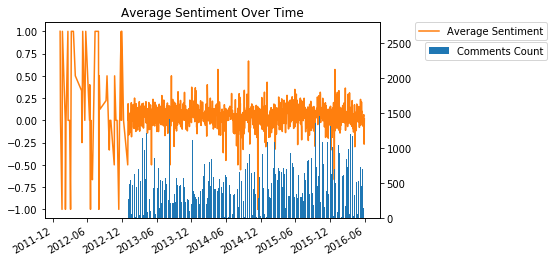

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

sentiment_by_time = pd.DataFrame(comments_df3.groupby('published_date').mean()['sentiment'])
sentiment_by_time.reset_index(inplace=True)

sentiment_count_by_time = pd.DataFrame(comments_df3.groupby('published_date').count()['sentiment'])
sentiment_count_by_time.reset_index(inplace=True)

sentiment_by_time = pd.merge(sentiment_by_time, sentiment_count_by_time, on='published_date')
sentiment_by_time.columns = ['published_date', 'mean_sentiment', 'sentiment_count']

sentiment_by_time = sentiment_by_time.dropna(subset=['mean_sentiment'])

fig, ax1 = plt.subplots()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

ax1.plot(sentiment_by_time.published_date, sentiment_by_time.mean_sentiment, 'C1', label='Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.gcf().autofmt_xdate()

ax2 = ax1.twinx()

ax2.bar(sentiment_by_time.published_date, sentiment_by_time.sentiment_count, label='Comments Count')

ax1.legend(bbox_to_anchor=(1.5, 1), loc=1, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.5, 0.9), loc=1, borderaxespad=0.)

plt.show()


# Find articles and comments during the dip near December 2014

In [30]:
beg_time = '2012-01-01'
end_time = '2016-12-31'

sentiment_by_time2 = sentiment_by_time[(sentiment_by_time.published_date >= beg_time) & (sentiment_by_time.published_date <= end_time)]
sentiment_by_time2.sort_values(by="mean_sentiment")

,published_date,mean_sentiment,sentiment_count
318,2012-11-14,-1.000000,1
213,2012-08-01,-1.000000,1
1045,2014-11-16,-1.000000,2
64,2012-03-05,-1.000000,1
37,2012-02-07,-1.000000,1
169,2012-06-18,-1.000000,1
19,2012-01-20,-1.000000,1
1447,2015-12-24,-0.666667,3
179,2012-06-28,-0.666667,3
954,2014-08-17,-0.555556,9


In [35]:
articles_df2[articles_df2.published_date == '2013-12-03'].head()

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,score,sentiment
944,20355895.0,"Suddenly, I'm the oldest person in the room - ...",http://www.theglobeandmail.com/opinion/the-old...,Margaret Wente,2014-09-06,118.0,73.0,<p>I saw a younger woman striding off to work ...,1.5401,1
2921,20350107.0,"Provincial challenges, federal dollars",http://www.theglobeandmail.com/opinion/provinc...,Jeffrey Simpson,2014-09-06,70.0,31.0,<p>Try as they might - and they will try - Can...,-0.5423,-1
3746,20380084.0,Are Gwyneth Paltrow and other celebrities wron...,http://www.theglobeandmail.com/opinion/are-gwy...,Elizabeth Renzetti,2014-09-06,52.0,23.0,<p>The world could use a few more celebrities ...,0.2505,0


In [38]:
articles_df2[articles_df2.published_date == '2016-02-20'].head()

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,score,sentiment
900,28815854.0,Why grit is highly overrated,http://www.theglobeandmail.com/opinion/why-gri...,Margaret Wente,2016-02-20,152.0,75.0,"<p>When I was six, I had a dream. I dreamed of...",-0.9345,-1
1831,28817845.0,Does the Supreme Court of Canada need more che...,http://www.theglobeandmail.com/opinion/does-th...,Jeffrey Simpson,2016-02-20,164.0,47.0,<p>A political brawl bids fair to surround the...,-0.2960,0
4804,28820035.0,Burst your comfort bubble - if only for the th...,http://www.theglobeandmail.com/opinion/burst-y...,Marsha Lederman,2016-02-20,23.0,16.0,<p>A funny thing happened on the way home from...,-0.5267,-1


In [39]:
articles_df2[articles_df2.published_date == '2014-09-06'].head()

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,score,sentiment
944,20355895.0,"Suddenly, I'm the oldest person in the room - ...",http://www.theglobeandmail.com/opinion/the-old...,Margaret Wente,2014-09-06,118.0,73.0,<p>I saw a younger woman striding off to work ...,1.5401,1
2921,20350107.0,"Provincial challenges, federal dollars",http://www.theglobeandmail.com/opinion/provinc...,Jeffrey Simpson,2014-09-06,70.0,31.0,<p>Try as they might - and they will try - Can...,-0.5423,-1
3746,20380084.0,Are Gwyneth Paltrow and other celebrities wron...,http://www.theglobeandmail.com/opinion/are-gwy...,Elizabeth Renzetti,2014-09-06,52.0,23.0,<p>The world could use a few more celebrities ...,0.2505,0


In [40]:
articles_df2[articles_df2.published_date == '2013-08-11'].head()

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,score,sentiment
5051,13698992.0,Police use of force and a promising investigation,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2013-08-11,33.0,14.0,"<p>The decision by Andre Marin, the Ombudsman ...",-1.0513,-1
7718,13698727.0,Bitcoin is money and subject to law,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2013-08-11,1.0,1.0,<p>The Bitcoin is a phenomenon of far-reaching...,0.4939,0


In [41]:
articles_df2[articles_df2.published_date == '2014-06-01'].head()

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,score,sentiment
2696,18931935.0,How misogyny can become terrorism,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2014-06-01,68.0,34.0,<p>The murderous attacks committed by a young ...,0.0000,0
6764,18931313.0,Don't try to separate abortion from maternal h...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2014-06-01,12.0,5.0,<p>Prime Minister Stephen Harper has positione...,-0.8066,-1


# Distribution articles and commentors by sentiments

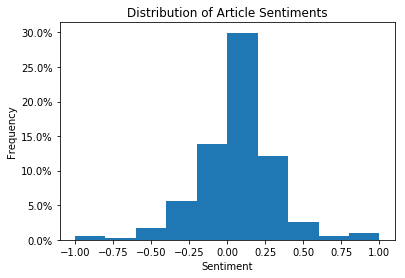

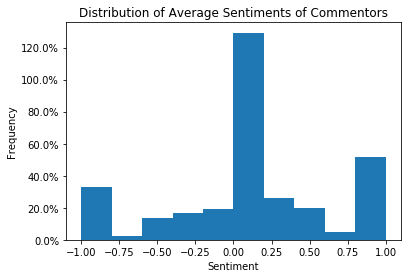

In [52]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker

def to_percent(y, position):
    s = str(y/100)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# distribution of articles
comments_df4 = comments_df3.groupby('article_id').mean()
comments_df4 = comments_df4.dropna(subset=['sentiment'])[['sentiment']]
comments_df4.reset_index(inplace=True)
comments_df4 = comments_df4.sort_values(by=['sentiment'], ascending=False)
comments_df4

plt.hist(comments_df4.sentiment)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Article Sentiments')

plt.show()

# distribution of average sentiments by commentors
comments_df4 = comments_df3.groupby('comment_author').mean()
comments_df4 = comments_df4.dropna(subset=['sentiment'])[['sentiment']]
comments_df4 = comments_df4.sort_values(by=['sentiment'], ascending=False)

plt.hist(comments_df4.sentiment)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Average Sentiments of Commentors')

plt.show()

# Correlation between sentiments of articles and comment 

In [41]:
import scipy.stats

articles_df3 = articles_df2[['article_id','sentiment', 'published_date']]
articles_df3 = pd.merge(articles_df3, mean_sentiment, on='article_id', how='inner') 

scipy.stats.pearsonr(articles_df3['mean_sentiment'].values,articles_df3['sentiment'].values)[0]


0.3602972086670267

In [42]:
articles_df3 = articles_df2[['article_id','sentiment', 'published_date']]
articles_df3 = pd.merge(articles_df3, mean_sentiment, on='article_id', how='inner') 

scipy.stats.pearsonr(articles_df3['mean_sentiment'].values,articles_df3['sentiment'].values)[0]


0.3602972086670267

In [43]:
articles_df3

,article_id,sentiment,published_date,mean_sentiment,sentiment_count
0,6929035,1,2013-01-05,0.097938,1164
1,11672346,0,2013-05-02,0.004429,1129
2,11508194,-1,2013-04-24,-0.150870,517
3,9255841,1,2013-03-04,-0.142857,602
4,7725145,-1,2013-01-24,0.078278,511
5,11451046,0,2013-04-22,-0.089655,435
6,11951156,1,2013-05-15,0.034286,350
7,11579462,-1,2013-04-27,-0.145349,344
8,9397380,1,2013-03-07,0.048000,500
9,10600939,1,2013-04-01,0.062500,432
